# <b> Part 4. 금융시장 데이터 수집부터 예측까지 적용해보기</b>

## Ch 1. 데이터 수집하기
- 자본시장 시계열 소개
- 파이썬 시계열 분석 패키지 설명
- 수집한 시장 데이터의 전처리 및 시계열 처리


## Ch 2. 자본시장 데이터 이용한 시장 예측해 보기
- Auto ARIMA를 이용하여 시장 예측하기
- Kalman-Filter를 이용하여 시장 예측하기
- 데이터 설명과 전처리
- 결과 해석


## Ch 3. 자본시장 데이터와 추가 변수를 이용한 시장 예측해 보기
- ARCH, GARCH 등 변동성 모형에 대하여 이해하기
- VAR 모형 등 다변량 모형 이용하여 경제지표 예측하기
- 결과 해석, 학습 결과의 비교

## <b> Ch 1. 학습목표 </b>
- 1) 데이터 수집 방법의 이해
- 2) 시계열 예측 모델링 구현 방법 습득
- 3) 모델별 가정의 차이 이해
- 4) 시계열 모델링 결과물의 해석
- 5) 시계열 예측 결과의 모델별 비교

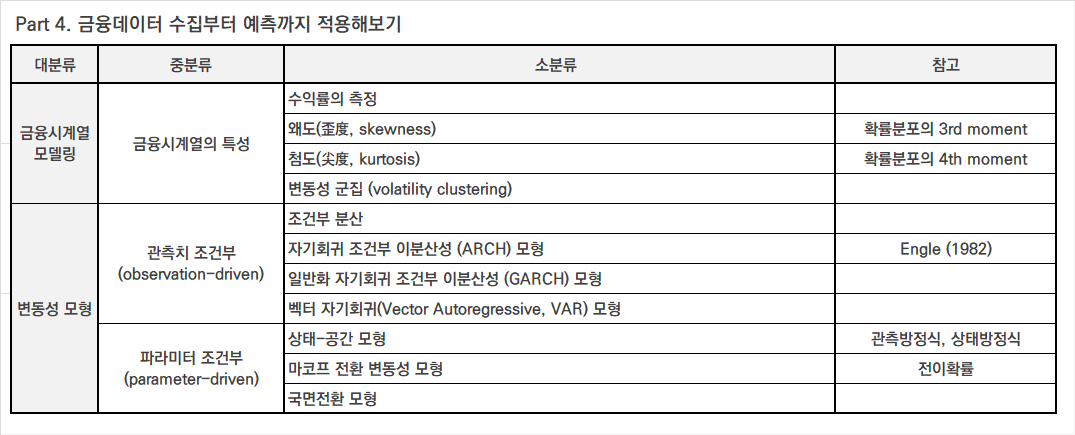

## <b> Ch 2. 데이터 수집하기 </b>

### 자본시장 시계열 소개
<b> 1. </b> 가격 시계열 vs <b>수익률 시계열</b> 

- scale-free
- stationary (<- random walk)
- distributional advantages

<b> 2. 수익률의 측정</b>
- (t-1 ~ t 기간 동안의) (One-period) Simple Return
- (t-1 ~ t - k 기간 동안의) (Multiperiod) Simple Return

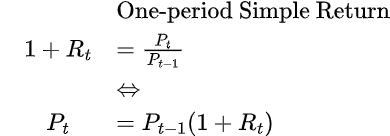

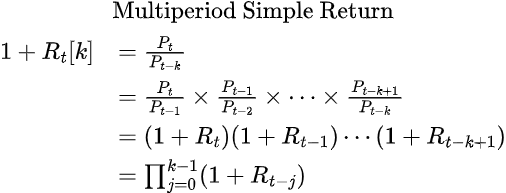

<b> 3. 연속복리 수익률(Continously Compounded Return) </b>
- 로그 수익률
- 퍼센트 수익률 r t = 100 * ln (P t / P t-1)

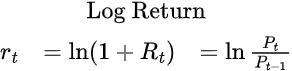

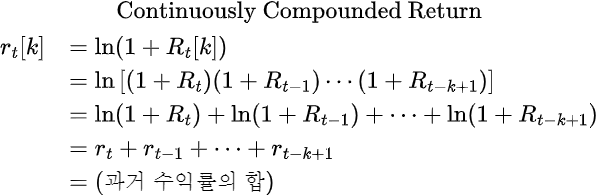

<b> 1. 일별 수익률 분포의 통계적 특성</b>
- (참고) 선행개념: 확률밀도함수(Probability Density Function, pdf)
- 왜도(skewness)가 높다 
  - 비대칭성
  - 정의: (확률밀도함수의 3rd central moment)
  - negative skew : mode값(최빈값)이 중간값보다 높을때
  - positive skew : mode값(최빈값)이 중앙값보다 낮을때
- 첨도(kurtosis)가 높다 
  - 두꺼운 꼬리분포(fat-tail)
  - 정의: (확률밀도함수의 4th central moment)
  - 정규분포의 경우 K(x) = 3이며, K(x) - 3 > 0 인 경우 첨도가 높다고 본다
  - 실무적으로는 정규분포에 비하여 극단값(extreme value)를 가질 확률이 높다는 뜻(leptokurtic)
  - 반대로 K(x) - 3 < 0 인 경우는 short-tail로 볼 수 있으며 극단적인 경우 uniform distribution over a finite interval 이 됨 (platykurtic)
  - negative kurtosis : 낮다, 예상밖의 이벤트 가능성 낮다
  - positive kurtosis : 높다, 예상밖의 이벤트 가능성 높다
- (일별, 월별, 연별) 수익률의 시계열적 특징: 자기 상관성이 없다 
  - 금융시장이 그만큼 Random Walk 하게 움직인다는 뜻

- 1차 모먼트: 평균
- 2차 모먼트: 분산
- 3차 모먼트, 4차 모먼트

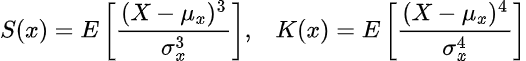

<b> 2. (c.f.) 자산 수익률을 측정하는 다른 방법</b> 
- APR (Annual Percentage Rate), CAGR (Compound Annual Growth Rate)

### 자본시장 시계열 데이터의 EDA (pandas 라이브러리로 시계열 다루기)

In [1]:
import numpy as np  
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt  
import os
import warnings        
warnings.filterwarnings("ignore") 
%matplotlib inline

In [2]:
# ticker:회사명
# CRM - salesforce

In [3]:
## 일 종가 데이터
filename = 'https://github.com/mchoimis/tsdl/raw/main/market/tr_eod_data_rounded.csv'
data = pd.read_csv(filename,  index_col=0, parse_dates=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
 1   MSFT.O  2138 non-null   float64
 2   INTC.O  2138 non-null   float64
 3   AMZN.O  2138 non-null   float64
 4   GS.N    2138 non-null   float64
 5   SPY     2138 non-null   float64
 6   .SPX    2138 non-null   float64
 7   .VIX    2138 non-null   float64
 8   EUR=    2216 non-null   float64
 9   XAU=    2211 non-null   float64
 10  GDX     2138 non-null   float64
 11  GLD     2138 non-null   float64
dtypes: float64(12)
memory usage: 225.1 KB


In [4]:
data.head()  
## 종목(애플, 마이크로 소프트, 인텔, 아마존, 골드만 삭스), ETF, S&P500, 변동성 인덱스, 환유로,환 커모니티

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.43,1096.35,NaN,NaN
2010-01-04,30.57,30.95,20.88,133.90,173.08,113.33,1132.99,20.04,1.44,1120.00,47.71,109.80
2010-01-05,30.63,30.96,20.87,134.69,176.14,113.63,1136.52,19.35,1.44,1118.65,48.17,109.70
2010-01-06,30.14,30.77,20.80,132.25,174.26,113.71,1137.14,19.16,1.44,1138.50,49.34,111.51
2010-01-07,30.08,30.45,20.60,130.00,177.67,114.19,1141.69,19.06,1.43,1131.90,49.10,110.82


In [5]:
data.tail()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2018-06-25,182.17,98.39,50.71,1663.15,221.54,271.00,2717.07,17.33,1.17,1265.00,22.01,119.89
2018-06-26,184.43,99.08,49.67,1691.09,221.58,271.60,2723.06,15.92,1.16,1258.64,21.95,119.26
2018-06-27,184.16,97.54,48.76,1660.51,220.18,269.35,2699.63,17.91,1.16,1251.62,21.81,118.58
2018-06-28,185.50,98.63,49.25,1701.45,223.42,270.89,2716.31,16.85,1.16,1247.88,21.93,118.22
2018-06-29,185.11,98.61,49.71,1699.80,220.57,271.28,2718.37,16.09,1.17,1252.25,22.31,118.65


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

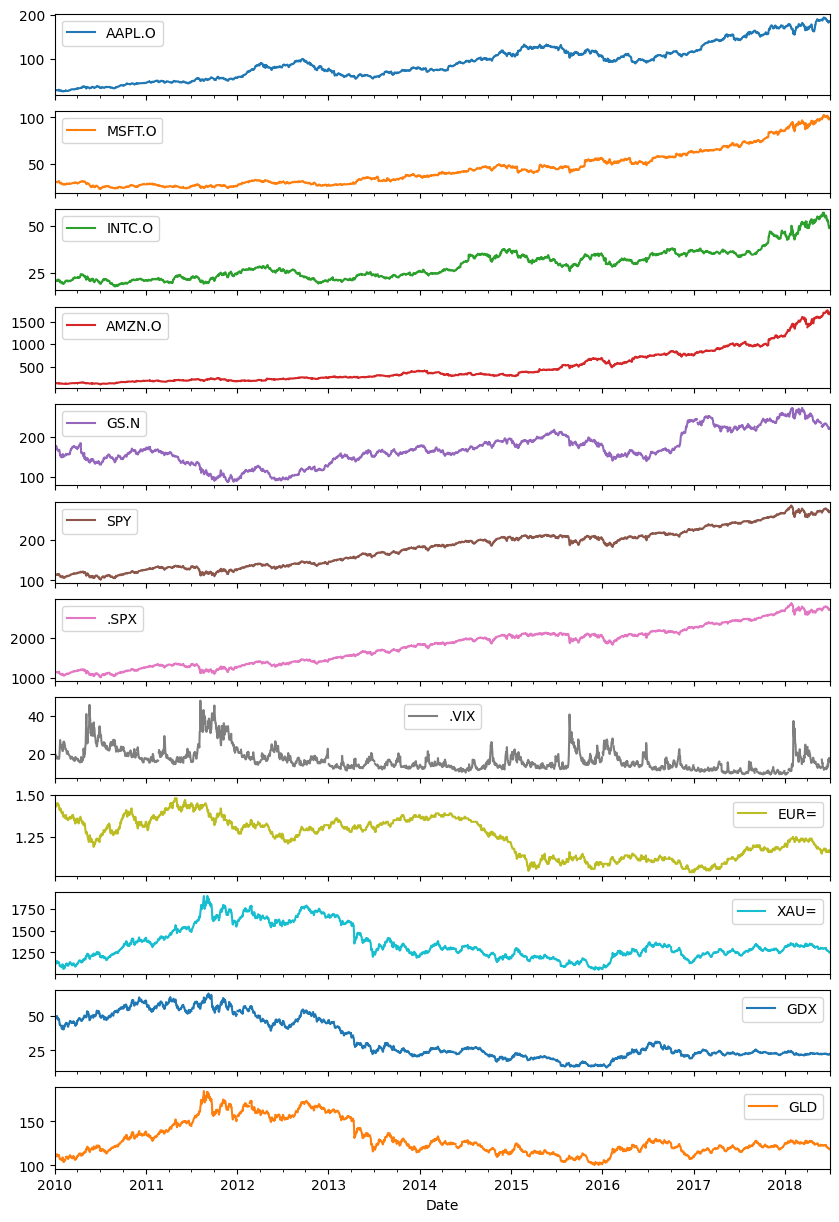

In [6]:
data.plot(figsize=(10, 15), subplots=True)

In [7]:
instruments = ['Apple Stock', 'Microsoft Stock',
               'Intel Stock', 'Amazon Stock', 'Goldman Sachs Stock',
               'SPDR S&P 500 ETF Trust', 'S&P 500 Index',
               'VIX Volatility Index', 'EUR/USD Exchange Rate',
               'Gold Price', 'VanEck Vectors Gold Miners ETF',
               'SPDR Gold Trust']

In [8]:
for ric, name in zip(data.columns, instruments):
    print('{:8s} | {}'.format(ric, name))

AAPL.O   | Apple Stock
MSFT.O   | Microsoft Stock
INTC.O   | Intel Stock
AMZN.O   | Amazon Stock
GS.N     | Goldman Sachs Stock
SPY      | SPDR S&P 500 ETF Trust
.SPX     | S&P 500 Index
.VIX     | VIX Volatility Index
EUR=     | EUR/USD Exchange Rate
XAU=     | Gold Price
GDX      | VanEck Vectors Gold Miners ETF
GLD      | SPDR Gold Trust


In [9]:
# Summary Stats
data.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
 1   MSFT.O  2138 non-null   float64
 2   INTC.O  2138 non-null   float64
 3   AMZN.O  2138 non-null   float64
 4   GS.N    2138 non-null   float64
 5   SPY     2138 non-null   float64
 6   .SPX    2138 non-null   float64
 7   .VIX    2138 non-null   float64
 8   EUR=    2216 non-null   float64
 9   XAU=    2211 non-null   float64
 10  GDX     2138 non-null   float64
 11  GLD     2138 non-null   float64
dtypes: float64(12)
memory usage: 225.1 KB


In [10]:
data.describe().round(2)  

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
count,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2216.00,2211.00,2138.00,2138.00
mean,93.46,44.56,29.36,480.46,170.22,180.32,1802.71,17.03,1.25,1349.01,33.57,130.09
std,40.55,19.53,8.17,372.31,42.48,48.19,483.34,5.88,0.11,188.75,15.17,18.78
min,27.44,23.01,17.66,108.61,87.70,102.20,1022.58,9.14,1.04,1051.36,12.47,100.50
25%,60.30,28.57,22.51,213.60,146.61,133.99,1338.57,13.07,1.13,1221.53,22.14,117.40
50%,90.56,39.66,27.33,322.06,164.43,186.32,1863.08,15.58,1.27,1292.61,25.62,124.00
75%,117.24,54.37,34.71,698.85,192.13,210.99,2108.94,19.07,1.35,1428.24,48.34,139.00
max,193.98,102.49,57.08,1750.08,273.38,286.58,2872.87,48.00,1.48,1898.99,66.63,184.59


In [11]:
data.mean()

AAPL.O      93.456076
MSFT.O      44.561155
INTC.O      29.364210
AMZN.O     480.461258
GS.N       170.216221
SPY        180.323045
.SPX      1802.713106
.VIX        17.027133
EUR=         1.248696
XAU=      1349.014129
GDX         33.566515
GLD        130.086595
dtype: float64

In [12]:
data.aggregate([min,  
                np.mean,  
                np.std,  
                np.median,  
                max]  
).round(2)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
min,27.44,23.01,17.66,108.61,87.70,102.20,1022.58,9.14,1.04,1051.36,12.47,100.50
mean,93.46,44.56,29.36,480.46,170.22,180.32,1802.71,17.03,1.25,1349.01,33.57,130.09
std,40.55,19.53,8.17,372.31,42.48,48.19,483.34,5.88,0.11,188.75,15.17,18.78
median,90.56,39.66,27.33,322.06,164.43,186.32,1863.08,15.58,1.27,1292.61,25.62,124.00
max,193.98,102.49,57.08,1750.08,273.38,286.58,2872.87,48.00,1.48,1898.99,66.63,184.59


In [13]:
## Changes over time

data.diff().head()  

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,23.65,NaN,NaN
2010-01-05,0.06,0.01,-0.01,0.79,3.06,0.30,3.53,-0.69,0.00,-1.35,0.46,-0.10
2010-01-06,-0.49,-0.19,-0.07,-2.44,-1.88,0.08,0.62,-0.19,0.00,19.85,1.17,1.81
2010-01-07,-0.06,-0.32,-0.20,-2.25,3.41,0.48,4.55,-0.10,-0.01,-6.60,-0.24,-0.69


In [14]:
data.diff().mean()  

AAPL.O    0.064745
MSFT.O    0.031252
INTC.O    0.013552
AMZN.O    0.706608
GS.N      0.028224
SPY       0.072101
.SPX      0.732659
.VIX     -0.019583
EUR=     -0.000117
XAU=      0.041887
GDX      -0.015070
GLD      -0.003455
dtype: float64

In [15]:
# Transformation of Price Series to Log Retrun Series
# Ln[Price_(t)- Price_(t-1) / Price_(t)]

In [16]:
# Using Pandas make return series
data.pct_change().round(3).head()  

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007,0.022,NaN,NaN
2010-01-05,0.002,0.000,-0.000,0.006,0.018,0.003,0.003,-0.034,0.000,-0.001,0.010,-0.001
2010-01-06,-0.016,-0.006,-0.003,-0.018,-0.011,0.001,0.001,-0.010,0.000,0.018,0.024,0.016
2010-01-07,-0.002,-0.010,-0.010,-0.017,0.020,0.004,0.004,-0.005,-0.007,-0.006,-0.005,-0.006


<Axes: >

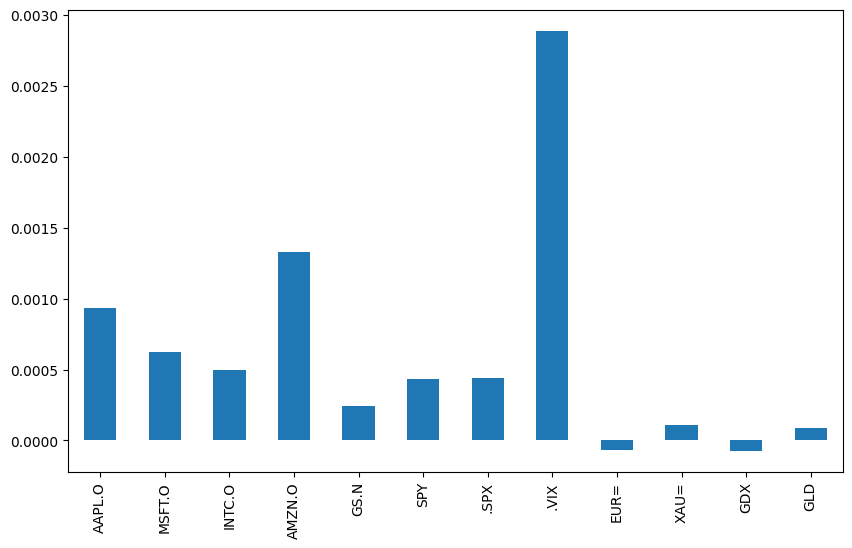

In [17]:
data.pct_change().mean().plot(kind='bar', figsize=(10, 6))

## <b> Ch 3. 금융시계열 이용하여 시장 예측하기 </b>




### 시계열을 금융분석에 응용하기

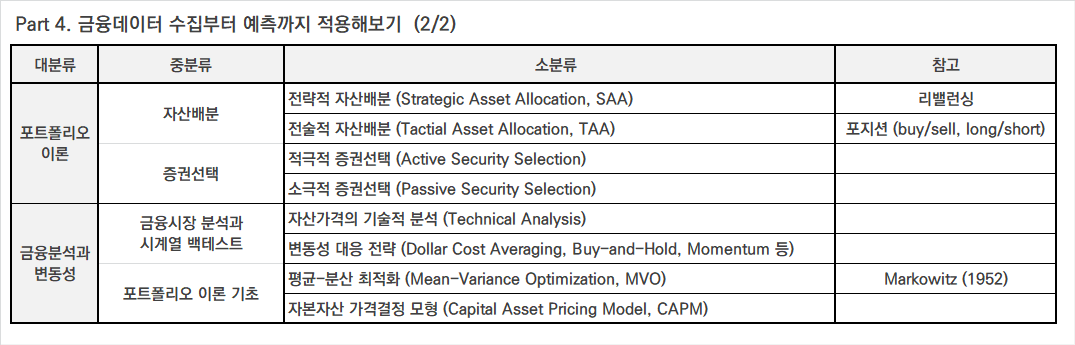

- 자산군(asset class)집합투자증권 기준

- 선진주식(Developed Market, DM)
- 신흥주식(Emerging Market, EM)
- 채권(Bond, Treasury, T-bill, Tips ....)
- 해외채권 국내채권
- 상품(commodity) 금, 은, 부동산(Property, Real Estate), REITS
- 환
- 캐쉬

### 포트폴리오 최적화

In [18]:
# 로그 수익률 시계열 만들기

In [19]:
filename = 'https://github.com/mchoimis/tsdl/raw/main/market/tr_eod_data_rounded.csv'
data = pd.read_csv(filename,  index_col=0, parse_dates=True)

In [20]:
data

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.43,1096.35,NaN,NaN
2010-01-04,30.57,30.95,20.88,133.90,173.08,113.33,1132.99,20.04,1.44,1120.00,47.71,109.80
2010-01-05,30.63,30.96,20.87,134.69,176.14,113.63,1136.52,19.35,1.44,1118.65,48.17,109.70
2010-01-06,30.14,30.77,20.80,132.25,174.26,113.71,1137.14,19.16,1.44,1138.50,49.34,111.51
2010-01-07,30.08,30.45,20.60,130.00,177.67,114.19,1141.69,19.06,1.43,1131.90,49.10,110.82
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,182.17,98.39,50.71,1663.15,221.54,271.00,2717.07,17.33,1.17,1265.00,22.01,119.89
2018-06-26,184.43,99.08,49.67,1691.09,221.58,271.60,2723.06,15.92,1.16,1258.64,21.95,119.26
2018-06-27,184.16,97.54,48.76,1660.51,220.18,269.35,2699.63,17.91,1.16,1251.62,21.81,118.58


In [21]:
data.shift(1)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.43,1096.35,NaN,NaN
2010-01-05,30.57,30.95,20.88,133.90,173.08,113.33,1132.99,20.04,1.44,1120.00,47.71,109.80
2010-01-06,30.63,30.96,20.87,134.69,176.14,113.63,1136.52,19.35,1.44,1118.65,48.17,109.70
2010-01-07,30.14,30.77,20.80,132.25,174.26,113.71,1137.14,19.16,1.44,1138.50,49.34,111.51
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,184.92,100.41,52.50,1715.67,226.02,274.74,2754.88,13.77,1.17,1268.49,22.18,120.34
2018-06-26,182.17,98.39,50.71,1663.15,221.54,271.00,2717.07,17.33,1.17,1265.00,22.01,119.89
2018-06-27,184.43,99.08,49.67,1691.09,221.58,271.60,2723.06,15.92,1.16,1258.64,21.95,119.26


In [22]:
data.shift(periods=-1)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,30.57,30.95,20.88,133.90,173.08,113.33,1132.99,20.04,1.44,1120.00,47.71,109.80
2010-01-04,30.63,30.96,20.87,134.69,176.14,113.63,1136.52,19.35,1.44,1118.65,48.17,109.70
2010-01-05,30.14,30.77,20.80,132.25,174.26,113.71,1137.14,19.16,1.44,1138.50,49.34,111.51
2010-01-06,30.08,30.45,20.60,130.00,177.67,114.19,1141.69,19.06,1.43,1131.90,49.10,110.82
2010-01-07,30.28,30.66,20.83,133.52,174.31,114.57,1144.98,18.13,1.44,1136.10,49.84,111.37
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,184.43,99.08,49.67,1691.09,221.58,271.60,2723.06,15.92,1.16,1258.64,21.95,119.26
2018-06-26,184.16,97.54,48.76,1660.51,220.18,269.35,2699.63,17.91,1.16,1251.62,21.81,118.58
2018-06-27,185.50,98.63,49.25,1701.45,223.42,270.89,2716.31,16.85,1.16,1247.88,21.93,118.22


In [23]:
rets = np.log(data / data.shift(1)) # 수익률 시계열 가장 간단하게 만드는 방법

In [24]:
symbols = ['AAPL', 'MSFT', 'INTC', 'AMZN', 'GS', 'SPY', 'SPX', 'VIX', 'EUR', 'XAU', 'GDX', 'GLD']
data_asset = data.copy()
data_asset.columns = symbols

In [25]:
rets_asset = np.log(data_asset / data_asset.shift(1)) # 자산이름 추가

In [26]:
rets_asset_summary = rets_asset[['AAPL', 'GS', 'SPY', 'VIX', 'GLD']] # 일부 종목 추출

<Axes: xlabel='Date'>

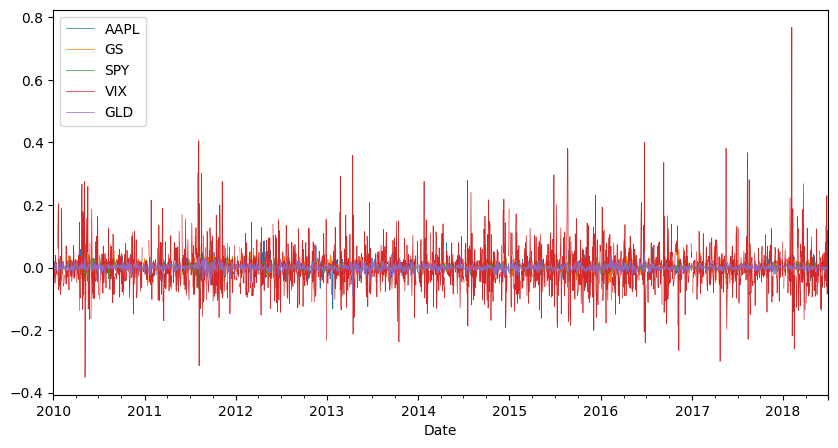

In [27]:
# Daily Return Visualized
rets_asset_summary .plot(figsize=(10, 5), lw=0.5)

In [28]:
# 일간 수익률을 연율화
rets.mean( )* 252

AAPL.O    0.181369
MSFT.O    0.124881
INTC.O    0.096782
AMZN.O    0.287548
GS.N      0.028561
SPY       0.097282
.SPX      0.098986
.VIX     -0.293504
EUR=     -0.022830
XAU=      0.009427
GDX      -0.104020
GLD      -0.003784
dtype: float64

In [29]:
ret = rets.dropna()

In [30]:
# 공분산 행렬
rets.cov() * 252

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
AAPL.O,0.064026,0.023646,0.023639,0.027066,0.023499,0.021151,0.021235,-0.144459,0.002032,0.001226,0.014513,0.001424
MSFT.O,0.023646,0.051201,0.030287,0.030386,0.026774,0.022389,0.022518,-0.149149,0.002453,-0.000382,0.010894,-0.000372
INTC.O,0.023639,0.030287,0.056405,0.025005,0.027758,0.022801,0.022903,-0.151103,0.003371,0.000144,0.012782,0.000170
AMZN.O,0.027066,0.030386,0.025005,0.095836,0.026640,0.024298,0.024449,-0.171029,0.003552,-0.001377,0.010232,-0.001364
GS.N,0.023499,0.026774,0.027758,0.026640,0.069593,0.028021,0.028125,-0.185918,0.004005,-0.002703,0.008299,-0.002603
SPY,0.021151,0.022389,0.022801,0.024298,0.028021,0.022050,0.022018,-0.146152,0.003563,0.000047,0.011889,0.000107
.SPX,0.021235,0.022518,0.022903,0.024449,0.028125,0.022018,0.022158,-0.147143,0.003596,0.000139,0.012039,0.000193
.VIX,-0.144459,-0.149149,-0.151103,-0.171029,-0.185918,-0.146152,-0.147143,1.502097,-0.018502,-0.000343,-0.077766,-0.000078
EUR=,0.002032,0.002453,0.003371,0.003552,0.004005,0.003563,0.003596,-0.018502,0.011256,0.004500,0.011675,0.004672
XAU=,0.001226,-0.000382,0.000144,-0.001377,-0.002703,0.000047,0.000139,-0.000343,0.004500,0.024912,0.044644,0.025450


In [31]:
# import numpy as np
import scipy.stats as scs
import statsmodels.api as sm
# import matplotlib.pyplot as plt
# %matplotlib inline

In [32]:
# pdf 생성 위한 인수
r = 0.05
M = 2061     ## 데이터 개수
sigma = 0.2

In [33]:
log_return = np.array(ret['SPY'])

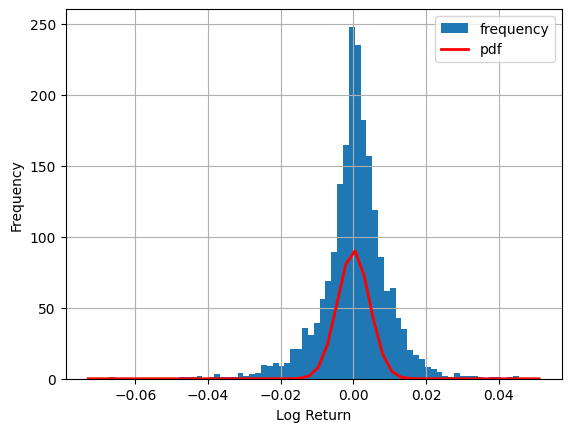

In [34]:
plt.hist(log_return.flatten(), bins=70, label='frequency')
plt.grid(True)
plt.xlabel('Log Return')
plt.ylabel('Frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])

## 정규분포
plt.plot(x, scs.norm.pdf(x, loc=r/M, scale=sigma/np.sqrt(M)), 'r', lw=2, label='pdf')
plt.legend()

In [35]:
# SciPy에서 수익률 데이터의 통계량 구하기
# scs.describe(log_return)

In [36]:
def print_statistics(array):
  sta = scs.describe(array)
  print('Statistic (통계량) |', 'Value (값)')
  print('--------------------')
  print('size |', sta[0])
  print('min |', sta[1][0])
  print('max |', sta[1][1])
  print('mean |', sta[2])
  print('std |', np.sqrt(sta[3]))
  print('skew|', sta[4])
  print('kurtosis |', sta[5])

In [37]:
print_statistics(log_return)

Statistic (통계량) | Value (값)
--------------------
size | 2061
min | -0.06734057781115321
max | 0.045450496816366155
mean | 0.00038603872907587357
std | 0.009354127350938931
skew| -0.5386276197067666
kurtosis | 4.611347558478201


In [38]:
# print("Skewness: {:.7f}".format( scs.skew(log_return)) )
print("Skewness Test p-value: {:.7f}".format( scs.skewtest(log_return)[1]) ) # 샘플의 왜도가 정규분포와 일치하는지(0에 가까운 값을 가지는지 판단)
# print("Kurtosis: {:.7f}".format( scs.kurtosis(log_return)) )
print("Kurtosis Test p-value: {:.7f}".format( scs.kurtosistest(log_return)[1]) ) # 샘플의 첨도가 정규분포와 일치하는지(0에 가까운 값을 가지는지 판단)
print("Normality Test p-value: {:.7f}".format( scs.normaltest(log_return)[1]) ) # 영가설: 샘플의 분포가 정규분포이다. (유의확률이 클수록 정규분포 가설을 강하게 지지)

Skewness Test p-value: 0.0000000
Kurtosis Test p-value: 0.0000000
Normality Test p-value: 0.0000000


Text(0.5, 1.0, 'Log Return Series Q-Q Plot')

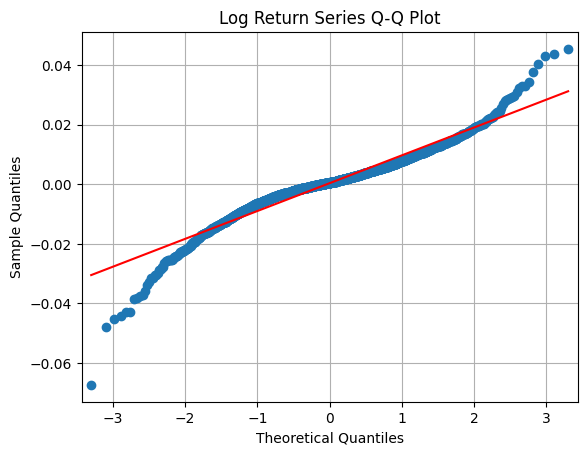

In [39]:
## qqplot : 정규화면 일치
sm.qqplot(log_return.flatten(), line='s')
plt.grid(True)
plt.xlabel("Theoretical Quantiles") #  (정규분포 상의 이론적 분위수)
plt.ylabel("Sample Quantiles") # (샘플 분위수)
plt.title("Log Return Series Q-Q Plot") # 강한 fat-tail

In [40]:
rets.columns

Index(['AAPL.O', 'MSFT.O', 'INTC.O', 'AMZN.O', 'GS.N', 'SPY', '.SPX', '.VIX',
       'EUR=', 'XAU=', 'GDX', 'GLD'],
      dtype='object')

array([[<Axes: title={'center': 'AAPL.O'}>,
        <Axes: title={'center': 'SPY'}>],
       [<Axes: title={'center': '.VIX'}>,
        <Axes: title={'center': 'GLD'}>]], dtype=object)

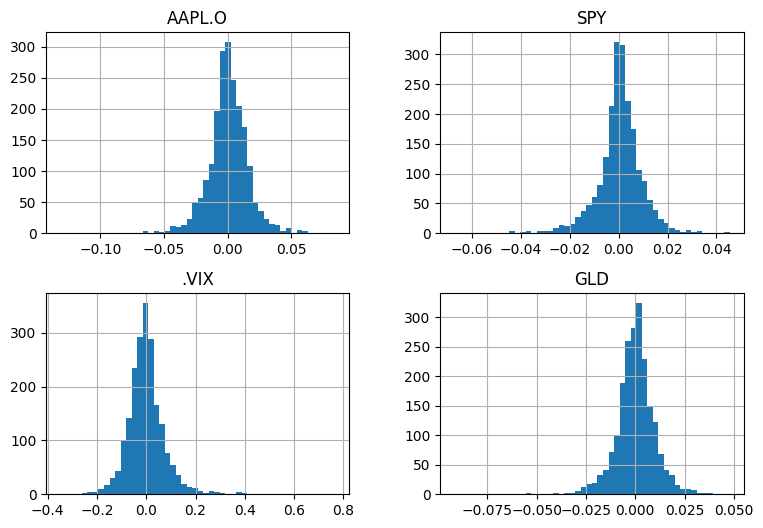

In [41]:
log_returns = rets[['AAPL.O','SPY','.VIX', 'GLD']]
log_returns.hist(bins=50, figsize=(9, 6))

In [42]:
# 포트폴리오 이론 기초

In [43]:
import scipy

In [44]:
rets_asset_summary.columns

Index(['AAPL', 'GS', 'SPY', 'VIX', 'GLD'], dtype='object')

In [45]:
np.random.seed(813)
noa = len(rets_asset_summary.columns)
weights = np.random.random(noa)
weights /= np.sum(weights)
weights

array([0.36667945, 0.3232487 , 0.09668174, 0.00235596, 0.21103415])

In [46]:
np.sum(rets_asset_summary.mean()*weights) * 252

0.08365183918390344

In [47]:
prets = [] # portfolio return
pvols = [] # poortfolio volatility
for p in range(2500):
  weights = np.random.random(noa)
  weights /= np.sum(weights)
  prets.append(np.sum(rets_asset_summary.mean() * weights) * 252)
  pvols.append(np.sqrt(np.dot(weights.T, np.dot(rets_asset_summary.cov() * 252, weights))))

prets = np.array(prets)
pvols = np.array(pvols)

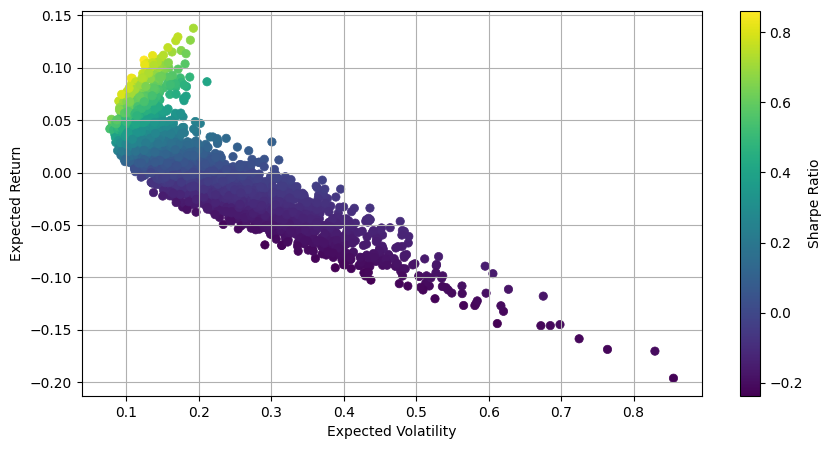

In [48]:
plt.figure(figsize=(10, 5))
plt.scatter(pvols, prets, c=prets/pvols, marker='o', lw=0.5)
plt.grid(True)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio') # objective

In [49]:
# Portfolio Optimization

In [50]:
def statistics(weights):
  weights = np.array(weights)
  pret = np.sum(rets_asset_summary.mean() * weights) * 252
  pvol = np.sqrt(np.dot(weights.T, np.dot(rets_asset_summary.cov() * 252, weights)))
  return np.array([pret, pvol, pret/pvol])

In [51]:
def min_sharpe(weights):
  return statistics(weights)[2]  * (-1)

In [52]:
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0, 1) for x in range(noa))

In [53]:
optimize = scipy.optimize.minimize(min_sharpe, noa * [1. / noa,], method='SLSQP', bounds=bounds, constraints=constraints)
optimize

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.9216716127761637
       x: [ 2.155e-01  0.000e+00  7.145e-01  6.998e-02  0.000e+00]
     nit: 9
     jac: [ 1.291e-04  9.204e-01  2.072e-04 -2.512e-03  7.777e-02]
    nfev: 59
    njev: 9

In [54]:
optimize.x.round(3)

array([0.215, 0.   , 0.715, 0.07 , 0.   ])

In [55]:
statistics(optimize.x.round(3)) # [pret, pvol, pret/pvol]

array([0.0880055, 0.0954847, 0.9216712])

### 자산가격 시계열의 기술적 분석과 매매전략

In [56]:
# 기술적 분석

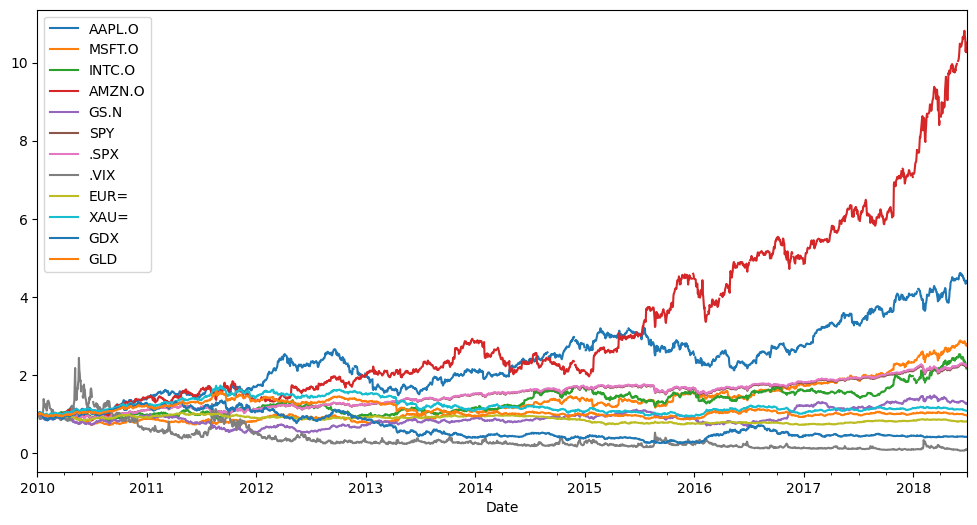

In [57]:
rets.cumsum().apply(np.exp).plot(figsize=(12, 6))
plt.show()

In [58]:
# 시계열의 Sampling
data.resample('1w', label='right').last().head()  

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.43,1096.35,NaN,NaN
2010-01-10,30.28,30.66,20.83,133.52,174.31,114.57,1144.98,18.13,1.44,1136.10,49.84,111.37
2010-01-17,29.42,30.86,20.80,127.14,165.21,113.64,1136.03,17.91,1.44,1129.90,47.42,110.86
2010-01-24,28.25,28.96,19.91,121.43,154.12,109.21,1091.76,27.31,1.41,1092.60,43.79,107.17
2010-01-31,27.44,28.18,19.40,125.41,148.72,107.39,1073.87,24.62,1.39,1081.05,40.72,105.96


In [59]:
data.resample('1m', label='right').last().head()  

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-31,27.44,28.18,19.40,125.41,148.72,107.39,1073.87,24.62,1.39,1081.05,40.72,105.96
2010-02-28,29.23,28.67,20.53,118.40,156.35,110.74,1104.49,19.50,1.36,1116.10,43.89,109.43
2010-03-31,33.57,29.29,22.29,135.77,170.63,117.00,1169.43,17.59,1.35,1112.80,44.41,108.95
2010-04-30,37.30,30.54,22.84,137.10,145.20,118.81,1186.69,22.05,1.33,1178.25,50.51,115.36
2010-05-31,36.70,25.80,21.42,125.46,144.26,109.37,1089.41,32.07,1.23,1215.71,49.86,118.88


<Axes: xlabel='Date'>

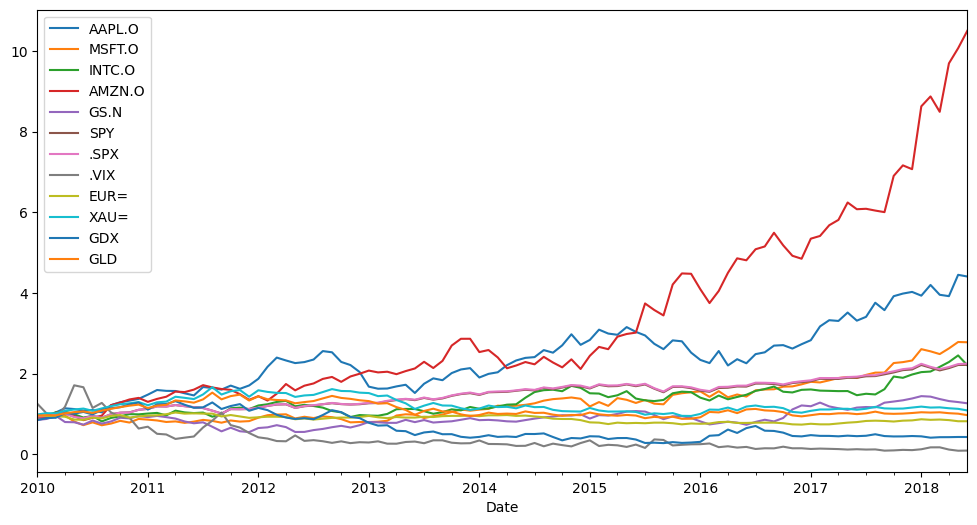

In [60]:
rets.cumsum().apply(np.exp).resample('1m', label='right').last().plot(figsize=(12, 6)) # 월간 수익률

In [61]:
## 시계열의 Rolling Statistics 구하기

sym = 'AAPL.O'
data = pd.DataFrame(data[sym]).dropna()
data.tail()

,AAPL.O
Date,
2018-06-25,182.17
2018-06-26,184.43
2018-06-27,184.16
2018-06-28,185.50
2018-06-29,185.11


In [62]:
import math
window = 20
data[sym].rolling(window=window).std() * math.sqrt(window)

Date
2010-01-04          NaN
2010-01-05          NaN
2010-01-06          NaN
2010-01-07          NaN
2010-01-08          NaN
                ...    
2018-06-25    14.590562
2018-06-26    15.312285
2018-06-27    16.012419
2018-06-28    16.248997
2018-06-29    16.575959
Name: AAPL.O, Length: 2138, dtype: float64

In [63]:
## 특정 기간 동안의 Rolling 지표 구하기 
window = 20  

data['min'] = data[sym].rolling(window=window).min()  
data['mean'] = data[sym].rolling(window=window).mean()  
data['std'] = data[sym].rolling(window=window).std()  
data['median'] = data[sym].rolling(window=window).median()  
data['max'] = data[sym].rolling(window=window).max()  
data['ewma'] = data[sym].ewm(halflife=0.5, min_periods=window).mean() # Exponentially Weighted Moving Average

data.dropna().head()

,AAPL.O,min,mean,std,median,max,ewma
Date,,,,,,,
2010-02-01,27.82,27.44,29.5810,0.933313,29.820,30.72,27.807013
2010-02-02,27.98,27.44,29.4515,0.967908,29.710,30.72,27.936753
2010-02-03,28.46,27.44,29.3430,0.950314,29.685,30.72,28.329188
2010-02-04,27.44,27.44,29.2080,1.020333,29.545,30.72,27.662297
2010-02-05,27.92,27.44,29.1000,1.037350,29.420,30.72,27.855574


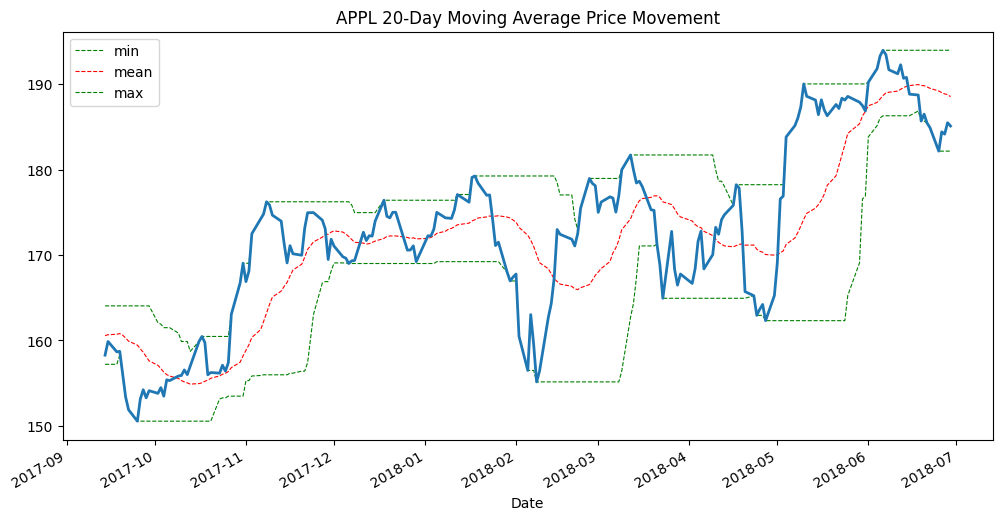

In [64]:
# Price Movement의 시각화
ax = data[['min', 'mean', 'max']].iloc[-200:].plot(figsize=(12, 6), style=['g--', 'r--', 'g--'], lw=0.8)  
data[sym].iloc[-200:].plot(ax=ax, lw=2.0)
plt.title("APPL 20-Day Moving Average Price Movement") # 구간화
plt.show()

In [65]:
###  자본시장 시계열의 기술적 분석
data['SMA1'] = data[sym].rolling(window=42).mean()  # short-term
data['SMA2'] = data[sym].rolling(window=252).mean()  # long-term
data[[sym, 'SMA1', 'SMA2']].tail()

,AAPL.O,SMA1,SMA2
Date,,,
2018-06-25,182.17,185.606190,168.265556
2018-06-26,184.43,186.087381,168.418770
2018-06-27,184.16,186.607381,168.579206
2018-06-28,185.50,187.089286,168.736627
2018-06-29,185.11,187.470476,168.901032


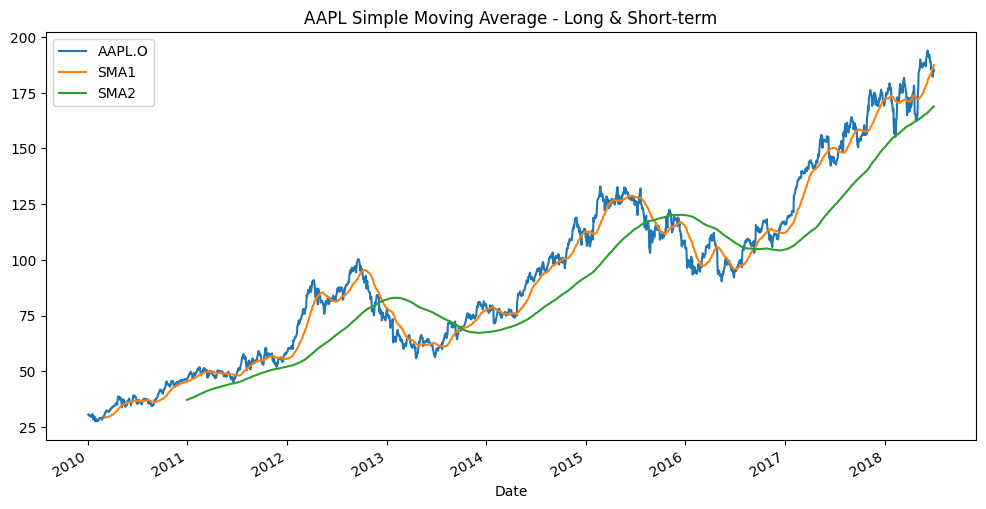

In [66]:
data[[sym, 'SMA1', 'SMA2']].plot(figsize=(12, 6))
plt.title("AAPL Simple Moving Average - Long & Short-term")
plt.show()

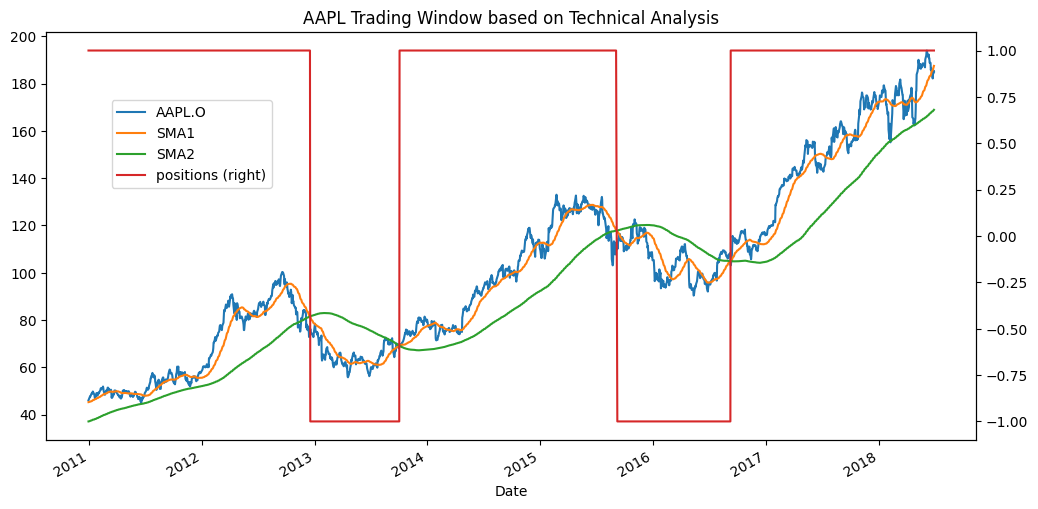

In [67]:
### 가격 추이에 따른 포지션(Trading Strategy)
# 예시: 골든 크로스(Golden Cross), 데드 크로스(Dead Cross)

data.dropna(inplace=True)  

data['positions'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)  # 1: buy , -1: sell /

ax = data[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(12, 6), secondary_y='positions') 
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

plt.title("AAPL Trading Window based on Technical Analysis")
plt.show()

### Auto ARIMA로 자산가격 예측하기

In [68]:
## Auto Arima(p, d, q) 실습

In [69]:
import numpy as np  
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt  
import os
import warnings        
warnings.filterwarnings("ignore") 
%matplotlib inline

In [70]:
import pmdarima as pm
from pmdarima.arima import ndiffs

In [71]:
filename = 'https://github.com/mchoimis/tsdl/raw/main/market/tr_eod_data_rounded.csv'
data = pd.read_csv(filename, index_col=0, parse_dates=True)

In [72]:
# 차분이 필요한지, 필요하다면 몇 차 차분이 최선인지 파악

In [73]:
data_y = data.dropna()

In [74]:
data_y

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.57,30.95,20.88,133.90,173.08,113.33,1132.99,20.04,1.44,1120.00,47.71,109.80
2010-01-05,30.63,30.96,20.87,134.69,176.14,113.63,1136.52,19.35,1.44,1118.65,48.17,109.70
2010-01-06,30.14,30.77,20.80,132.25,174.26,113.71,1137.14,19.16,1.44,1138.50,49.34,111.51
2010-01-07,30.08,30.45,20.60,130.00,177.67,114.19,1141.69,19.06,1.43,1131.90,49.10,110.82
2010-01-08,30.28,30.66,20.83,133.52,174.31,114.57,1144.98,18.13,1.44,1136.10,49.84,111.37
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,182.17,98.39,50.71,1663.15,221.54,271.00,2717.07,17.33,1.17,1265.00,22.01,119.89
2018-06-26,184.43,99.08,49.67,1691.09,221.58,271.60,2723.06,15.92,1.16,1258.64,21.95,119.26
2018-06-27,184.16,97.54,48.76,1660.51,220.18,269.35,2699.63,17.91,1.16,1251.62,21.81,118.58


In [75]:
y = data_y[['AAPL.O']].iloc[-200:]
y

,AAPL.O
Date,
2017-09-14,158.28
2017-09-15,159.88
2017-09-18,158.67
2017-09-19,158.73
2017-09-20,156.07
...,...
2018-06-25,182.17
2018-06-26,184.43
2018-06-27,184.16


In [76]:
ndiffs(y) # 차수

1

In [77]:
y_train = y['AAPL.O'][:int(0.7*len(y))]
y_test = y['AAPL.O'][int(0.7*len(y)):] 

<Axes: xlabel='Date'>

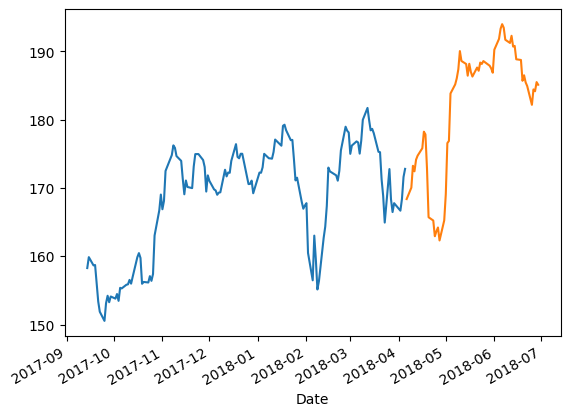

In [78]:
y_train.plot()
y_test.plot()

In [79]:
kpss_diffs = ndiffs(y_train, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(y_train, alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)

print(f"d = {n_diffs}")

d = 1


In [80]:
model = pm.auto_arima(y = y_train       # 데이터
                      , d = 1           # (d)차분 차수 (기본값 = none), 지정하지 않으면 실행 기간이 매우 길어질 수 있음
                      , start_p = 0     # (p)탐색 시초값 (기본값 = 2)
                      , max_p = 3       # (기본값 = 5)
                      , start_q = 0     # (q)탐색 시초값 (기본값 = 2)
                      , max_q = 3       # (기본값 = 5)
                      , m = 1           # (기본값 = 1)
                      , seasonal = False # 기본값 = True, 계절변동 ARIMA(SARIMA)에 해당시 True로 수정
                      , stepwise = True  
                      , trace=True      # stepwise로 모델을 적합할 때마다 결과를 프린트
                      )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=632.062, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=633.161, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=632.943, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=630.345, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=633.865, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.229 seconds


In [81]:
model = pm.auto_arima (y_train, d = 1, seasonal = False, trace = True)
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=632.062, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=633.161, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=632.943, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=630.345, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=633.865, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.420 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [82]:
# 잔차 검정
# 잔차가 백색잡음 과정인지 (=정상성을 만족하는지), 정규성 및 등분산성을 만족하는지 파악합
# 1. summary 결과에서 Ljung-Box (Q) / Heteroskedasticity (H) / Jarque-Bera (JB) 검정 만족 여부를 파악
# 2. plot_diagnostics 잔차 그래프로 정상성과 정규성을 만족하는지 파악

In [83]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  140
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -314.172
Date:                Mon, 12 Jun 2023   AIC                            630.345
Time:                        22:46:33   BIC                            633.279
Sample:                             0   HQIC                           631.537
                                - 140                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         5.3795      0.509     10.576      0.000       4.383       6.376
Ljung-Box (L1) (Q):                   0.92   Jarque-Bera (JB):                 9.58
Prob(Q):                              0.34   Pr

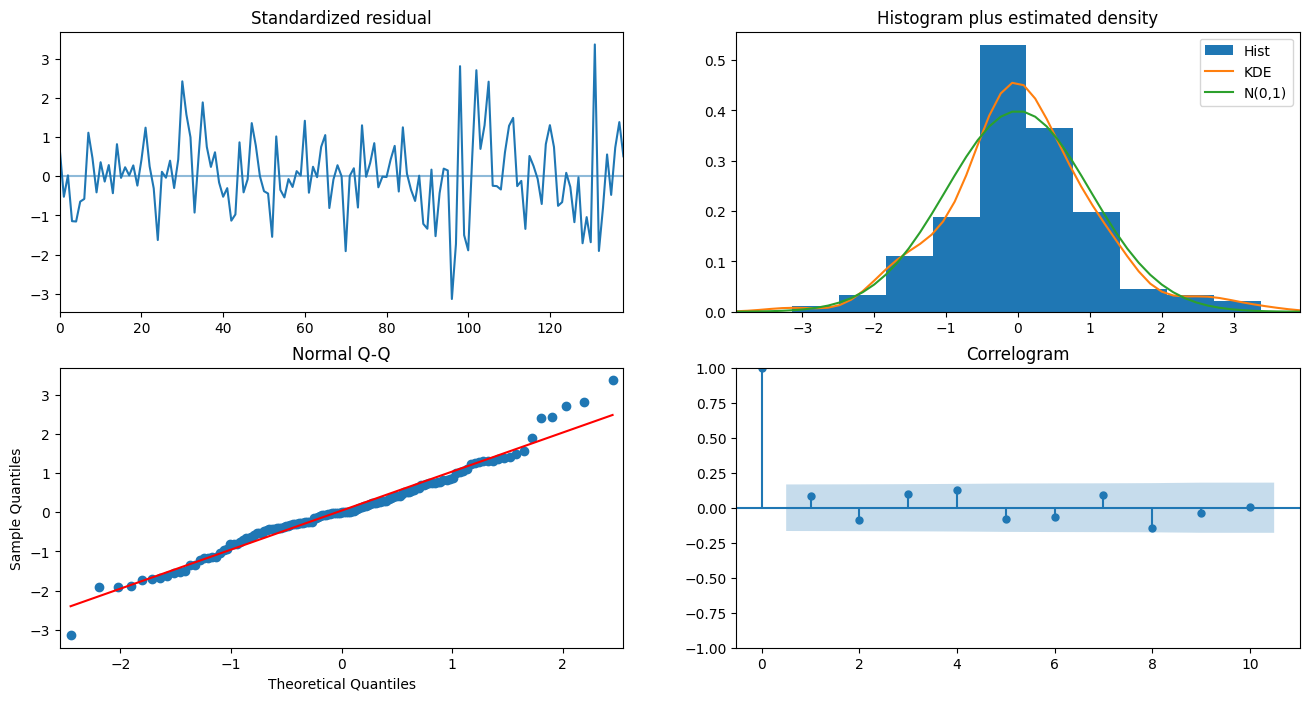

In [84]:
model.plot_diagnostics(figsize=(16, 8))
plt.show()

In [85]:
# 모형 예측

In [86]:
y_train.head(5)

Date
2017-09-14    158.28
2017-09-15    159.88
2017-09-18    158.67
2017-09-19    158.73
2017-09-20    156.07
Name: AAPL.O, dtype: float64

In [87]:
y_test

Date
2018-04-06    168.38
2018-04-09    170.05
2018-04-10    173.25
2018-04-11    172.44
2018-04-12    174.14
2018-04-13    174.73
2018-04-16    175.82
2018-04-17    178.24
2018-04-18    177.84
2018-04-19    172.80
2018-04-20    165.72
2018-04-23    165.24
2018-04-24    162.94
2018-04-25    163.65
2018-04-26    164.22
2018-04-27    162.32
2018-04-30    165.26
2018-05-01    169.10
2018-05-02    176.57
2018-05-03    176.89
2018-05-04    183.83
2018-05-07    185.16
2018-05-08    186.05
2018-05-09    187.36
2018-05-10    190.04
2018-05-11    188.59
2018-05-14    188.15
2018-05-15    186.44
2018-05-16    188.18
2018-05-17    186.99
2018-05-18    186.31
2018-05-21    187.63
2018-05-22    187.16
2018-05-23    188.36
2018-05-24    188.15
2018-05-25    188.58
2018-05-29    187.90
2018-05-30    187.50
2018-05-31    186.87
2018-06-01    190.24
2018-06-04    191.83
2018-06-05    193.31
2018-06-06    193.98
2018-06-07    193.46
2018-06-08    191.70
2018-06-11    191.23
2018-06-12    192.28
2018-06-

In [88]:
y_pred = model.predict(n_periods=len(y_test)) # Test 기간 = 60일 

In [89]:
y_pred

140    172.8
141    172.8
142    172.8
143    172.8
144    172.8
145    172.8
146    172.8
147    172.8
148    172.8
149    172.8
150    172.8
151    172.8
152    172.8
153    172.8
154    172.8
155    172.8
156    172.8
157    172.8
158    172.8
159    172.8
160    172.8
161    172.8
162    172.8
163    172.8
164    172.8
165    172.8
166    172.8
167    172.8
168    172.8
169    172.8
170    172.8
171    172.8
172    172.8
173    172.8
174    172.8
175    172.8
176    172.8
177    172.8
178    172.8
179    172.8
180    172.8
181    172.8
182    172.8
183    172.8
184    172.8
185    172.8
186    172.8
187    172.8
188    172.8
189    172.8
190    172.8
191    172.8
192    172.8
193    172.8
194    172.8
195    172.8
196    172.8
197    172.8
198    172.8
199    172.8
dtype: float64

In [90]:
y_test_predict_df = pd.DataFrame({"test": y_test, "pred": y_pred})
y_predict_df = y_test_predict_df['pred']
y_predict_df

2018-04-06 00:00:00      NaN
2018-04-09 00:00:00      NaN
2018-04-10 00:00:00      NaN
2018-04-11 00:00:00      NaN
2018-04-12 00:00:00      NaN
                       ...  
195                    172.8
196                    172.8
197                    172.8
198                    172.8
199                    172.8
Name: pred, Length: 120, dtype: float64

In [91]:
# 모델 업데이트 설정

In [92]:
def forecast_one_step():
    fc, conf_int = model.predict(n_periods=1, return_conf_int=True)         ## 예측값:fc(리스트) , 신뢰구간:conf_int(넘파이배열 리스트)          
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0]                                    ## 한 단계 예측값과 해당 예측의 신뢰 구간을 반환합니다
    )

In [93]:
forecasts = []
y_pred = []
pred_upper = []
pred_lower = []

for new_ob in y_test:
    fc, conf = forecast_one_step()
    y_pred.append(fc)
    pred_upper.append(conf[1])
    pred_lower.append(conf[0])

    ## 모형 업데이트
    model.update(new_ob)

In [94]:
pd.DataFrame({"test": y_test, "pred": y_pred})

,test,pred
Date,,
2018-04-06,168.38,172.80
2018-04-09,170.05,168.38
2018-04-10,173.25,170.05
2018-04-11,172.44,173.25
2018-04-12,174.14,172.44
2018-04-13,174.73,174.14
2018-04-16,175.82,174.73
2018-04-17,178.24,175.82
2018-04-18,177.84,178.24


In [95]:
# 결과의 해석

In [96]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -451.049
Date:                Mon, 12 Jun 2023   AIC                            904.098
Time:                        22:46:35   BIC                            907.391
Sample:                             0   HQIC                           905.431
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         5.4481      0.410     13.288      0.000       4.645       6.252
Ljung-Box (L1) (Q):                   3.01   Jarque-Bera (JB):                20.51
Prob(Q):                              0.08   Pr

In [97]:
y_test_predict_df = pd.DataFrame({"test": y_test, "pred": y_pred})
y_predict_df = y_test_predict_df['pred']
y_predict_df

Date
2018-04-06    172.80
2018-04-09    168.38
2018-04-10    170.05
2018-04-11    173.25
2018-04-12    172.44
2018-04-13    174.14
2018-04-16    174.73
2018-04-17    175.82
2018-04-18    178.24
2018-04-19    177.84
2018-04-20    172.80
2018-04-23    165.72
2018-04-24    165.24
2018-04-25    162.94
2018-04-26    163.65
2018-04-27    164.22
2018-04-30    162.32
2018-05-01    165.26
2018-05-02    169.10
2018-05-03    176.57
2018-05-04    176.89
2018-05-07    183.83
2018-05-08    185.16
2018-05-09    186.05
2018-05-10    187.36
2018-05-11    190.04
2018-05-14    188.59
2018-05-15    188.15
2018-05-16    186.44
2018-05-17    188.18
2018-05-18    186.99
2018-05-21    186.31
2018-05-22    187.63
2018-05-23    187.16
2018-05-24    188.36
2018-05-25    188.15
2018-05-29    188.58
2018-05-30    187.90
2018-05-31    187.50
2018-06-01    186.87
2018-06-04    190.24
2018-06-05    191.83
2018-06-06    193.31
2018-06-07    193.98
2018-06-08    193.46
2018-06-11    191.70
2018-06-12    191.23
2018-06-

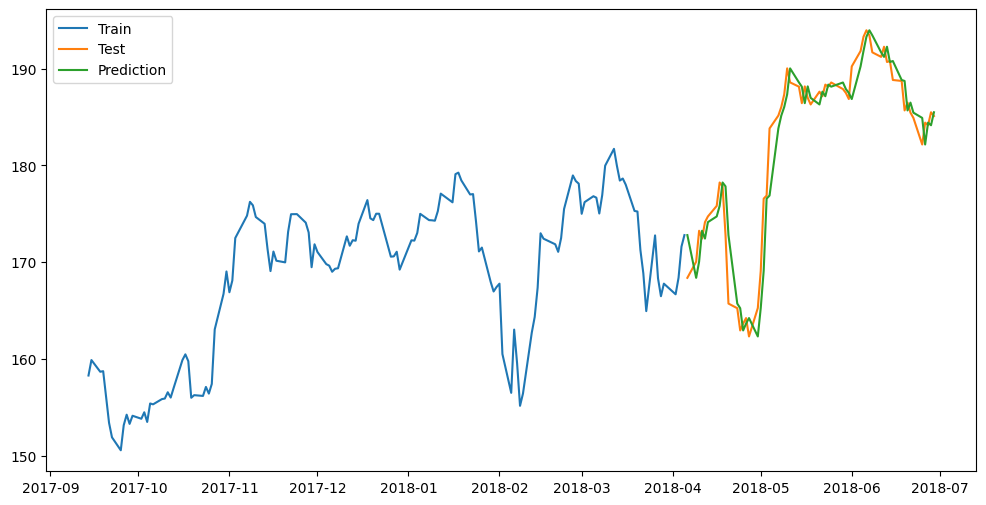

In [98]:
fig, axes = plt.subplots(1, 1, figsize=(12, 6))
plt.plot(y_train, label='Train')        
plt.plot(y_test, label='Test')          
plt.plot(y_predict_df, label='Prediction')   
plt.legend()
plt.show()

In [99]:
# 시계열 모형의 평가 (mean absolute percentage error)

In [100]:
def MAPE(y_test, y_pred): 
	return np.mean(np.abs((y_test - y_pred) / y_test)) * 100 
    
print(f"MAPE (%): {MAPE(y_test, y_pred):.3f}")

MAPE (%): 0.949
